# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Below is a Python cell, there is nothing at the top of the cell because it is python by default.

In [4]:
# EXAMPLE PYTHON CELL

# create a dataframe of random numbers with two columns, A and B
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))

# display first 5 rows
df.head(5)

,A,B
0,1,7
1,10,41
2,36,1
3,79,7
4,80,40


Now another R cell, `%%R -i df` indicates that this is an R cell and imports the dataframe from Python. This is one way to pass data back and forth from R to Python. Another is to write a CSV file in Python and read it in R (or vice versa)

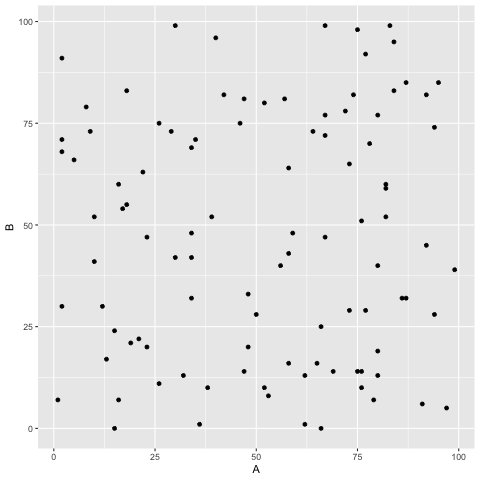

In [5]:
%%R -i df

# Plotting using R
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Thoughts

#### Why I like this setup
- It lets me do some things in Python (hitting APIs, scraping, etc)
- It lets do other things in R (statistical calculations, visualization, etc)

#### How I use this setup
- If things start to get complicated, I move Python functions into `.py` files in the repo and then call those functions from the notebook. This keeps the notebook clean.
- While you can read the pandas dataframe directly into R by putting `%%R -i df` at the top of the cell, I prefer to save human-readable CSV files at the end of the python cells (usually _wide_ format), and then read those CSV files into the R cells and convert it to whatever format I need to visualize it (usually _long_ format). This allows me to:
    - send the CSV data files along with the article to my editor
    - file the R code + CSV files to the charts team and they can just run it and modify as needed

#### Other thoughts about ths setup
- I have found it useful to learn R (or Python) while on deadline. When I was learning R it allowed me to switch back to Python if I was stuck on a step and the deadline was approaching, and then switch back to R to finish up.
- Storing code away in functions in separate files let me keep the notebooks very clean and readable and proved to be a good way to annotate my process for the quantitative edit.
- One-click pipeline, I could quickly change a variable and re-run an analysis with new data or a different query.

